## Preparation of r/politicaldiscussion data by Alexandria Benedict

This data comes from the Kaggle dataset [May 2015 Reddit Comments](https://www.kaggle.com/reddit/reddit-comments-may-2015) which has over 30GB of data - all comments from the month of May 2015. This subset is 20,000 comments from the r/politicaldiscussion subreddit.

In [1]:
import numpy as np
import pandas as pd
import nltk
import sklearn as sk
import re # regex
import matplotlib
%matplotlib inline

In [3]:
df = pd.read_csv('../datasets/politicaldiscussion-20k-comments.csv')
df.head()

,created_utc,ups,subreddit_id,link_id,name,score_hidden,author_flair_css_class,author_flair_text,subreddit,id,...,downs,archived,author,score,retrieved_on,body,distinguished,edited,controversiality,parent_id
0,1430438403,11.0,t5_2sfmf,t3_34g4l1,t1_cqug92x,0.0,NaN,NaN,PoliticalDiscussion,cqug92x,...,0.0,0.0,Trorbes,11.0,1.432703e+09,Don't get me wrong as I'd love to give you a c...,NaN,0.0,0.0,t1_cqudtpc
1,1430438572,-1.0,t5_2sfmf,t3_34ef01,t1_cqugcj6,0.0,NaN,NaN,PoliticalDiscussion,cqugcj6,...,0.0,0.0,HealthcareEconomist3,-1.0,1.432703e+09,2nd cite deals with employment effects and wag...,NaN,0.0,1.0,t1_cqug4ve
2,1430438676,1.0,t5_2sfmf,t3_34eamh,t1_cqugent,0.0,NaN,NaN,PoliticalDiscussion,cqugent,...,0.0,0.0,GrandEthos,1.0,1.432703e+09,"&gt; Again, that is either naive or dishonest....",NaN,0.0,0.0,t1_cqu0f02
3,1430438716,2.0,t5_2sfmf,t3_34eamh,t1_cqugfk8,0.0,NaN,NaN,PoliticalDiscussion,cqugfk8,...,0.0,0.0,GrandEthos,2.0,1.432703e+09,&gt; None of the four Originalist are expected...,NaN,0.0,0.0,t1_cqu02s6
4,1430438763,4.0,t5_2sfmf,t3_34gfei,t1_cqugglw,0.0,NaN,NaN,PoliticalDiscussion,cqugglw,...,0.0,0.0,Left_of_Center2011,4.0,1.432703e+09,"I think the key term in that report is Income,...",NaN,0.0,1.0,t1_cqug6h8


In [4]:
all_comments = df['body'] # put all the comment bodies into a pandas DataFrame
all_comments.describe()

count         20000
unique        19135
top       [deleted]
freq            833
Name: body, dtype: object

In [5]:
# deleted comments Series
deleted_comments = all_comments[all_comments == "[deleted]"]
deleted_comments.describe()

count           833
unique            1
top       [deleted]
freq            833
Name: body, dtype: object

In [6]:
# valid comments!
comments = all_comments.drop(deleted_comments.index)
comments = comments.to_frame().reset_index(drop=True).astype('str')
comments.head()

,body
0,Don't get me wrong as I'd love to give you a c...
1,2nd cite deals with employment effects and wag...
2,"&gt; Again, that is either naive or dishonest...."
3,&gt; None of the four Originalist are expected...
4,"I think the key term in that report is Income,..."


In [7]:
comments['body'][1]

'2nd cite deals with employment effects and wage effects.'

In [8]:
# clean out any urls and and brackets, parenthesis and hyphens, leaving only alphanumeric words
url_regex = r"([--:\w?@%&+~#=]*\.[a-z]{2,4}\/{0,2})((?:[?&](?:\w+)=(?:\w+))+|[--:\w?@%&+~#=]+)?"
special_character_regex = r"[\"'()[\]]"

#remove urls, special characters, and replace hyphens with a space
comments['clean'] = comments['body'].apply(lambda text: text.strip().lower()).apply(lambda text: re.sub(url_regex, '', text)).apply(lambda text: re.sub(special_character_regex, '', text)).apply(lambda text: re.sub(r"-", ' ', text))
comments['clean'].head()

0    dont get me wrong as id love to give you a com...
1    2nd cite deals with employment effects and wag...
2    &gt; again, that is either naive or dishonest....
3    &gt; none of the four originalist are expected...
4    i think the key term in that report is income,...
Name: clean, dtype: object

In [9]:
comments['tokens'] = comments['clean'].apply(lambda text: re.sub(r"[.,!?]"," ", text)).apply(lambda text: re.sub(r"[0-9]", " ", text)).apply(nltk.wordpunct_tokenize)

In [10]:
comments

,body,clean,tokens
0,Don't get me wrong as I'd love to give you a c...,dont get me wrong as id love to give you a com...,"[dont, get, me, wrong, as, id, love, to, give,..."
1,2nd cite deals with employment effects and wag...,2nd cite deals with employment effects and wag...,"[nd, cite, deals, with, employment, effects, a..."
2,"&gt; Again, that is either naive or dishonest....","&gt; again, that is either naive or dishonest....","[&, gt, ;, again, that, is, either, naive, or,..."
3,&gt; None of the four Originalist are expected...,&gt; none of the four originalist are expected...,"[&, gt, ;, none, of, the, four, originalist, a..."
4,"I think the key term in that report is Income,...","i think the key term in that report is income,...","[i, think, the, key, term, in, that, report, i..."
...,...,...,...
19169,The U.S. government is the aggressor in the w...,the u.s. government is the aggressor in the wa...,"[the, u, s, government, is, the, aggressor, in..."
19170,If you're against the initiation of the use of...,if youre against the initiation of the use of ...,"[if, youre, against, the, initiation, of, the,..."
19171,If you're relying on Bloomberg hit pieces to g...,if youre relying on bloomberg hit pieces to gi...,"[if, youre, relying, on, bloomberg, hit, piece..."
19172,Are you aware about what you just said? This i...,are you aware about what you just said? this i...,"[are, you, aware, about, what, you, just, said..."


## Decisions when cleaning and preparing data

For this analysis, we chose to remove markdown syntax as well as URLs. This is because they're not really important for forming new sentences for that subreddit, as valid markdown can just be text. Let's see the choices used for each DataFrame columns and why!

- body - This column is the original markdown source text. It's less than 20k because we remove any comments that are deleted.
- clean - This column strips whitespace at the beginning and ending of the body text, then converts to lowercase. We then remove URLs and markdown special characters such as `[`,`]`, and `(`,`)` characters. We also remove `-` characters but replace with a space, since hyphens act similar to a space syntactically.
- tokens - This column simply uses the `wordpunct_tokenize` method and seperates the clean column into a list. Before tokenizing, we strip any punctuation! We don't need punctuation for analysis on this part, as we're going to use the `tokens` column to analyse token frequency, uniqueness, and other metrics.

We'll use the `clean` column when separating the sentences into n-grams later, which is why we don't include `<START>` and `<STOP>` here, as this is just preprocessing and exploratory analysis, not building linguistic models.

In [11]:
all_words = [token for sentence in comments['tokens'] for token in sentence]

In [12]:
freqdist = nltk.FreqDist(all_words)
freqdist

FreqDist({'the': 66022, 'to': 39995, 'a': 31217, 'of': 30466, 'and': 28363, 'that': 23974, 'is': 22981, 'in': 19496, 'i': 16310, 'you': 15640, ...})

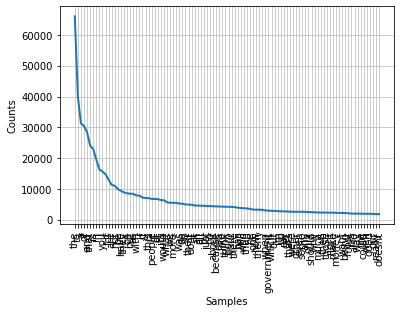

In [13]:
freqdist.plot(100)

In [14]:
print("Number of occurances of 'I':", freqdist['i'])
print("Number of occurances of 'You':", freqdist['you'])

Number of occurances of 'I': 16310
Number of occurances of 'You': 15640


In [15]:
unique_words = []
for word in all_words:
    if word not in unique_words:
        unique_words.append(word)

print("Total words: ", len(all_words))
print("Unique words: ", len(unique_words))
print("Words that only occur once: ", len([word for word in all_words if freqdist[word] == 1]))

Total words:  1365413
Unique words:  27235
Words that only occur once:  9493


In [16]:
avg_len_chars = 0
for comment in comments['clean']:
    avg_len_chars += len(comment)
avg_len_chars /= len(comments)

avg_len_words = 0
for comment in comments['tokens']:
    avg_len_words += len(comment)
avg_len_words /= len(comments)

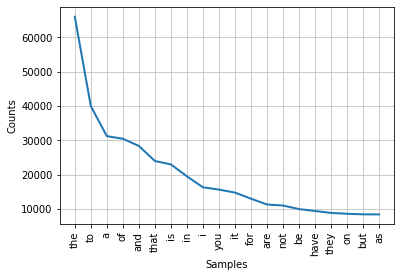

In [17]:
freqdist.plot(20)